In [2]:
import pandas as pd
import arviz as az
import numpy as np
import math
from matplotlib import pyplot as plt

In [3]:
%config Inline.figure_format = 'retina'
az.style.use('arviz-darkgrid')

In [4]:
df = pd.read_pickle('events.pkl')
df

,eventInfo,magnitudes,picks,arrivals
0,{'publicID': 'smi:insight.mqs/Event/20210120-1...,[],[{'publicID': 'smi:insight.mqs/Pick/20210120-1...,[{'pickID': 'smi:insight.mqs/Pick/20210120-100...
1,"{'publicID': 'smi:insight.mqs/mqs2020yvsr', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2021011313...,[{'pickID': 'smi:insight.mqs/Pick/202101131329...
2,{'publicID': 'smi:insight.mqs/Event/20210120-1...,[],[{'publicID': 'smi:insight.mqs/Pick/20210120-1...,[{'pickID': 'smi:insight.mqs/Pick/20210120-100...
3,"{'publicID': 'smi:insight.mqs/mqs2020ynfi', 'p...",[],[{'publicID': 'smi:insight.mqs/Pick/2020121711...,[{'pickID': 'smi:insight.mqs/Pick/202012171112...
4,{'publicID': 'smi:insight.mqs/Event/20210111-1...,[],[{'publicID': 'smi:insight.mqs/Pick/20210111-1...,[{'pickID': 'smi:insight.mqs/Pick/20210111-100...
...,...,...,...,...
1281,"{'publicID': 'smi:insight.mqs/mqs2019gudd', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20200...,[{'publicID': 'smi:insight.mqs/Pick/2019110515...,[{'pickID': 'smi:insight.mqs/Pick/201911051530...
1282,"{'publicID': 'smi:insight.mqs/mqs2019fxyu', 'p...",[],[{'publicID': 'smi:insight.mqs/Pick/2019100111...,[{'pickID': 'smi:insight.mqs/Pick/201910011119...
1283,"{'publicID': 'smi:insight.mqs/mqs2019fddj', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2019100113...,[{'pickID': 'smi:insight.mqs/Pick/20210326-123...
1284,"{'publicID': 'smi:insight.mqs/mqs2019awjs', 'p...",[],[{'publicID': 'smi:insight.mqs/Pick/20200626-1...,[{'pickID': 'smi:insight.mqs/Pick/20200626-143...


In [5]:
# Keep only events that have magnitudes
for index, row in df.iterrows():
    if row['magnitudes'] == []:
        df.drop(index, inplace=True)
        
# Reset index to not have gaps in indexing
df = df.reset_index()
df

,index,eventInfo,magnitudes,picks,arrivals
0,1,"{'publicID': 'smi:insight.mqs/mqs2020yvsr', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2021011313...,[{'pickID': 'smi:insight.mqs/Pick/202101131329...
1,5,"{'publicID': 'smi:insight.mqs/mqs2020xjnc', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2020120110...,[{'pickID': 'smi:insight.mqs/Pick/202012011035...
2,6,"{'publicID': 'smi:insight.mqs/mqs2020xhlg', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2020120814...,[{'pickID': 'smi:insight.mqs/Pick/202012081449...
3,9,"{'publicID': 'smi:insight.mqs/mqs2020uksp', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2020102010...,[{'pickID': 'smi:insight.mqs/Pick/202010201005...
4,11,"{'publicID': 'smi:insight.mqs/mqs2020tpep', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2020100609...,[{'pickID': 'smi:insight.mqs/Pick/202010060922...
...,...,...,...,...,...
277,1277,"{'publicID': 'smi:insight.mqs/mqs2019inqk', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2020062507...,[{'pickID': 'smi:insight.mqs/Pick/20210326-123...
278,1278,"{'publicID': 'smi:insight.mqs/mqs2019ilml', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20191...,[{'publicID': 'smi:insight.mqs/Pick/2019101710...,[{'pickID': 'smi:insight.mqs/Pick/201910171036...
279,1279,"{'publicID': 'smi:insight.mqs/mqs2019hdxw', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2019092720...,[{'pickID': 'smi:insight.mqs/Pick/20210326-123...
280,1281,"{'publicID': 'smi:insight.mqs/mqs2019gudd', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20200...,[{'publicID': 'smi:insight.mqs/Pick/2019110515...,[{'pickID': 'smi:insight.mqs/Pick/201911051530...


In [15]:
df['arrivals'][0]

[{'pickID': 'smi:insight.mqs/Pick/20210113132912.474877.41139',
  'phase': 'S_spectral_end',
  'azimuth': '108.8539635',
  'distance': '4.951151082e-05',
  'takeoffAngle': 'None',
  'timeResidual': 'None',
  'timeWeight': '1'},
 {'pickID': 'smi:insight.mqs/Pick/20201219213227.636938.47403',
  'phase': 'Peak_M2.4',
  'azimuth': '108.8539635',
  'distance': '4.951151082e-05',
  'takeoffAngle': 'None',
  'timeResidual': 'None',
  'timeWeight': '1'},
 {'pickID': 'smi:insight.mqs/Pick/20201219213227.636264.47401',
  'phase': 'S_spectral_start',
  'azimuth': '108.8539635',
  'distance': '4.951151082e-05',
  'takeoffAngle': 'None',
  'timeResidual': 'None',
  'timeWeight': '1'},
 {'pickID': 'smi:insight.mqs/Pick/20201219213227.635997.47400',
  'phase': 'P_spectral_end',
  'azimuth': '108.8539635',
  'distance': '4.951151082e-05',
  'takeoffAngle': 'None',
  'timeResidual': 'None',
  'timeWeight': '1'},
 {'pickID': 'smi:insight.mqs/Pick/20201219213227.635655.47399',
  'phase': 'P_spectral_star

In [6]:
df['picks'][0]

[{'publicID': 'smi:insight.mqs/Pick/20210113132912.474877.41139',
  'time': '2020-12-19T10:17:32.679948Z',
  'phase': 'S_spectral_end',
  'evaluationMode': 'manual',
  'networkCode': 'XB',
  'stationCode': 'ELYSE',
  'locationCode': '65',
  'channelCode': 'EHZ'},
 {'publicID': 'smi:insight.mqs/Pick/20201219213227.636938.47403',
  'time': '2020-12-19T10:16:35.822775Z',
  'phase': 'Peak_M2.4',
  'evaluationMode': 'manual',
  'networkCode': 'XB',
  'stationCode': 'ELYSE',
  'locationCode': '02',
  'channelCode': 'BHZ'},
 {'publicID': 'smi:insight.mqs/Pick/20201219213227.636264.47401',
  'time': '2020-12-19T10:15:40.469119Z',
  'phase': 'S_spectral_start',
  'evaluationMode': 'manual',
  'networkCode': 'XB',
  'stationCode': 'ELYSE',
  'locationCode': '02',
  'channelCode': 'BHZ'},
 {'publicID': 'smi:insight.mqs/Pick/20201219213227.635997.47400',
  'time': '2020-12-19T10:15:27.759924Z',
  'phase': 'P_spectral_end',
  'evaluationMode': 'manual',
  'networkCode': 'XB',
  'stationCode': 'ELYS

In [7]:
# SEPARATE THE MAGNITUDES

# Index where there is only MFB ( WILL USE LATER IN WAITING TIMES )
index=[]
# Magnitudes of type MFB
magnitudesMFB = []
# Magnitudes of type M24
magnitudesM24 = []
# Iterate through the length of column 'magnitudes'
for i in range(len(df['magnitudes'])):
    # Iterate through every element of the column 'magnitudes' ( each column is a list)
    for j in range(len(df['magnitudes'][i])):
        # Check that the element has 'MFB' type magnitude
        if df['magnitudes'][i][j]['magType'] == 'MFB':
            magnitudesMFB.append(float(df['magnitudes'][i][j]['mag']))
            index.append(i)
            break
        # Check that the element has 'M2.4' type magnitude
        if df['magnitudes'][i][j]['magType'] == 'M2.4':
            magnitudesM24.append(float(df['magnitudes'][i][j]['mag']))
            break

# realize that it can be M2.4 and MFB, but there are iterations with only MFB

In [9]:
len(magnitudesM24)

254

In [10]:
len(magnitudesMFB)

28

In [14]:
max(magnitudesMFB)

3.7

In [13]:
max(magnitudesM24)

2.4

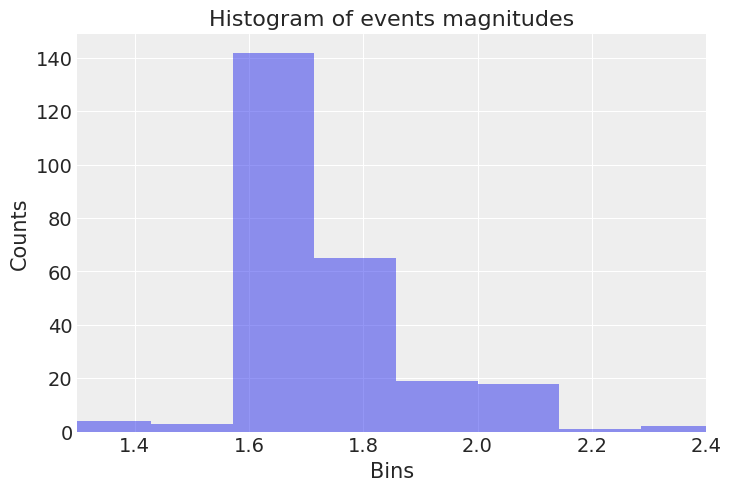

In [9]:
# Histogram of amplitudes
data = magnitudesM24
bins = np.linspace(math.floor(min(data)), math.ceil(max(data)), 15) # fixed number of bins

plt.xlim([min(data), max(data)])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Histogram of events magnitudes')
plt.xlabel('Bins')
plt.ylabel('Counts')

plt.savefig('Histogram of Events on Mars - Magnitudes only uniques.png')
plt.show()

In [10]:
# Waiting times

df2=df
# Use the INDEX found earlier to get rid of rows containing only MFB => data with only M2.4 magnitudes
df2.drop(index, inplace=True)
# Reset the indexing again to not have gaps
df2 = df2.reset_index()

In [11]:
# Select the times from the remaining data (250 events, all with M2.4 magnitudes)
times=[]
for i in range(len(df2['picks'])):
    times.append(pd.to_datetime(df2['picks'][i][0]['time']))


In [13]:
# Magnitudes and times should match with eachother, so create a DataFrame containing them
d={'times':times,'magnitudes':magnitudesM24}
df3 = pd.DataFrame(d)

# Save to csv in case I need to use this later
df3.to_csv('times-magnitudes-250events.csv')
df3

,times,magnitudes
0,2019-04-07 09:18:33.207473+00:00,2.1
1,2019-05-01 03:24:20.781746+00:00,2.0
2,2019-05-18 18:12:57.689589+00:00,1.9
3,2019-06-02 02:36:53.584615+00:00,2.0
4,2019-06-03 04:02:38.613670+00:00,1.8
...,...,...
249,2020-10-05 16:38:02.451109+00:00,1.7
250,2020-10-17 11:43:48.861817+00:00,1.6
251,2020-11-27 09:05:49.519235+00:00,1.7
252,2020-11-28 12:18:35.729686+00:00,1.8


In [14]:
# Waiting times - simple variant ( withoud delta )
from datetime import date
from matplotlib import pyplot as plt 

def waitingTimes(quakeData):
    
    firstEvent = quakeData['times'][0]
    
    delta = 0.5
    
    wtid = []
    
    for i in range(1,len(quakeData['magnitudes'])):
        secondEvent = quakeData['times'][i]

        wtid.append((secondEvent-firstEvent).days)
        firstEvent = quakeData['times'][i]
            
    wtid = [abs(x) for x in wtid]
    bins = np.linspace(math.ceil(min(wtid)), 
                   math.floor(max(wtid)),
                   25)
    
    plt.clf() # clears figure
    plt.hist(wtid,bins=bins,density=True) # ignores first element
    plt.xscale('log')
    plt.xlabel(r'$\tau(days)$', fontsize=14)
    plt.yscale('log')
    plt.ylabel(r'P($\tau$)', fontsize=14)
    plt.title('Waiting times')
    #plt.savefig("Waiting times.pdf")
    plt.savefig("waitingTimesMars.png")

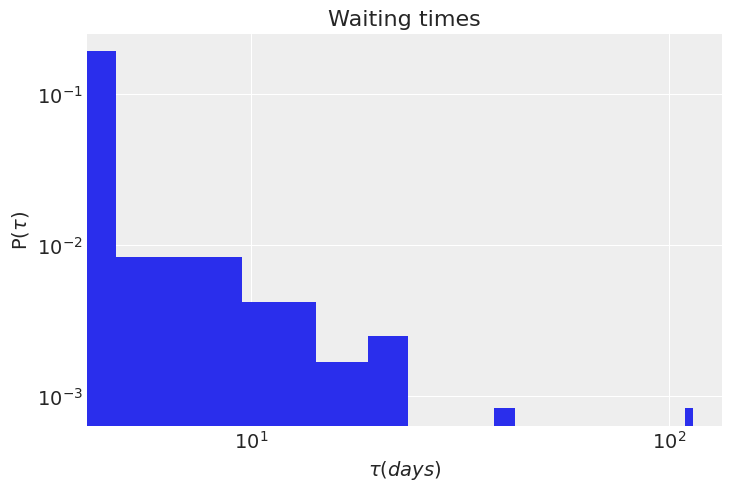

In [15]:
waitingTimes(df3)

In [16]:
df3

,times,magnitudes
0,2019-04-07 09:18:33.207473+00:00,2.1
1,2019-05-01 03:24:20.781746+00:00,2.0
2,2019-05-18 18:12:57.689589+00:00,1.9
3,2019-06-02 02:36:53.584615+00:00,2.0
4,2019-06-03 04:02:38.613670+00:00,1.8
...,...,...
249,2020-10-05 16:38:02.451109+00:00,1.7
250,2020-10-17 11:43:48.861817+00:00,1.6
251,2020-11-27 09:05:49.519235+00:00,1.7
252,2020-11-28 12:18:35.729686+00:00,1.8


In [28]:
wtid = []
for i in range(len(df3['magnitudes'])):
    firstEvent = df3['times'][i]
    for j in range(i,len(df3['magnitudes'])):
        if df3['magnitudes'][j]>=df3['magnitudes'][i]+0.6:
            secondEvent = df3['times'][j]
            break;
    wtid.append((secondEvent-firstEvent).days)

Text(0.5, 1.0, 'Waiting times')

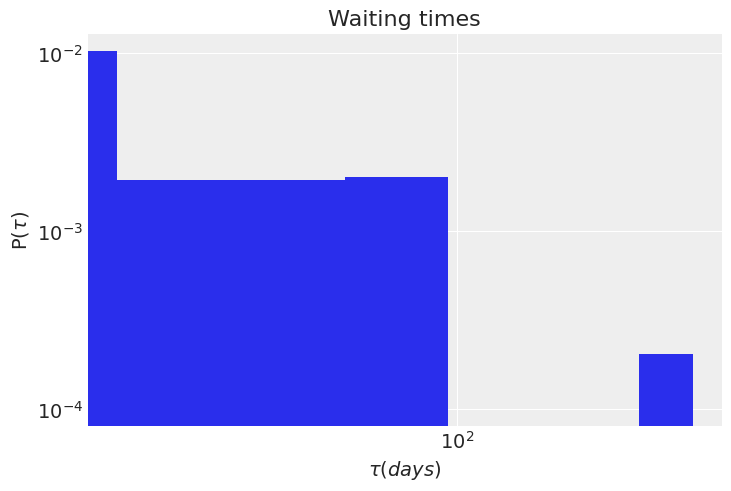

In [29]:
plt.hist(wtid,bins=round(math.sqrt(len(wtid))),density=True) # ignores first element
plt.xscale('log')
plt.xlabel(r'$\tau(days)$', fontsize=14)
plt.yscale('log')
plt.ylabel(r'P($\tau$)', fontsize=14)
plt.title('Waiting times')

In [30]:
def waitingTimes2(df3, delta):
    #quakeData['times']=pd.to_datetime(quakeData['times'])
    wtid = []
    
    for i in range(len(df3['magnitudes'])):
        firstEvent = df3['times'][i]
        for j in range(i+1,len(df3['magnitudes'])):
            if df3['magnitudes'][j]>=df3['magnitudes'][i]+delta:
                secondEvent = df3['times'][j]
                break;
        wtid.append((secondEvent-firstEvent).days)
    

    return(wtid)

UnboundLocalError: local variable 'secondEvent' referenced before assignment

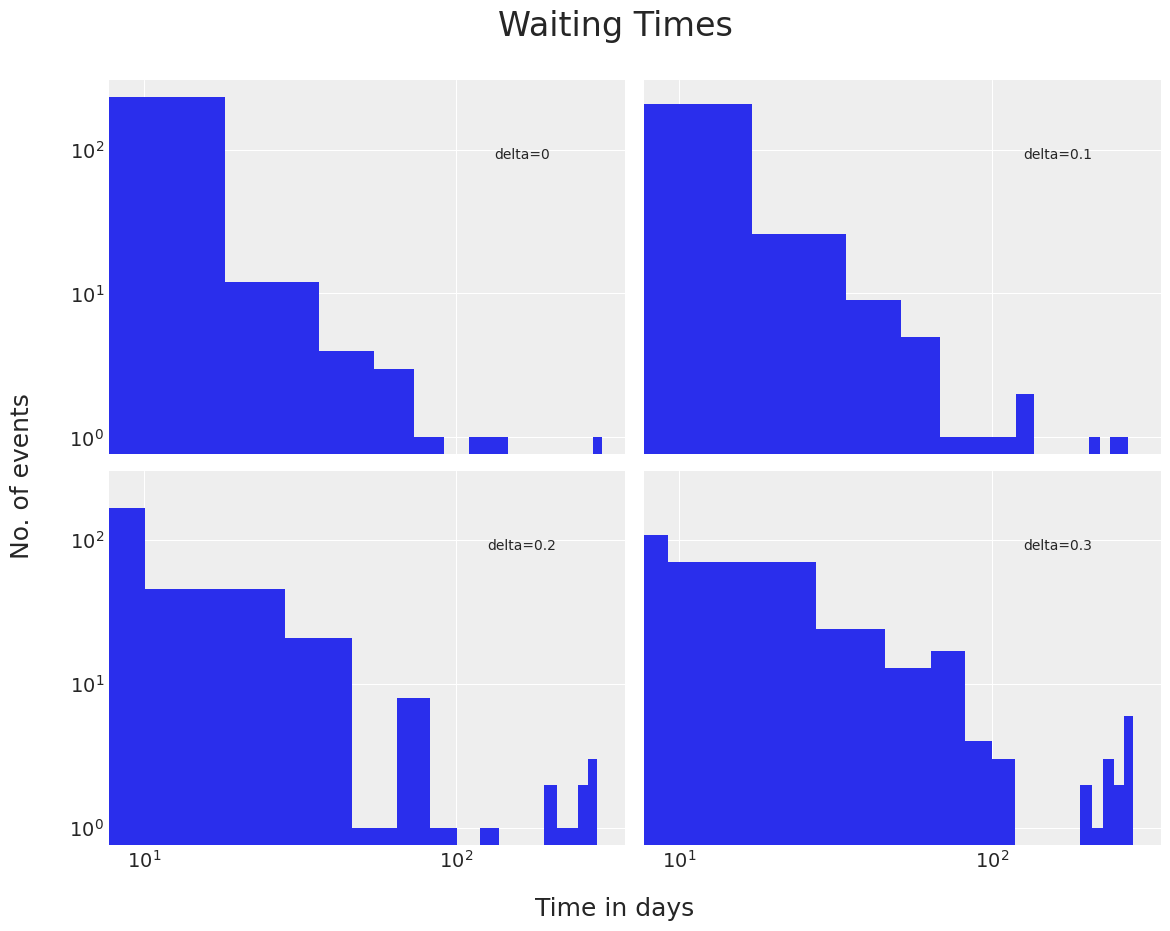

In [33]:
# Make 6 plots using different deltas

fig, ax = plt.subplots(2, 2, figsize=(11,8), sharex=True, sharey=True)
#ax.suptitle('Waiting times', fontsize=14) 

fig.text(0.5, -0.05, 'Time in days', ha='center', fontsize=18)
fig.text(-0.05, 0.5, 'No. of events', va='center', rotation='vertical', fontsize=18)
fig.text(0.5, 1.05, 'Waiting Times', ha='center', fontsize=24)

ax = np.ravel(ax)
delta =[0, 0.1, 0.2, 0.3, 0.4]

for i in range(len(delta)):
    wtimes = waitingTimes2(df3, delta[i])
    ax[i].hist(wtimes, bins=round(math.sqrt(len(wtimes))))
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].text(0.8, 0.8, f'delta={delta[i]}', ha='center', va='center', transform=ax[i].transAxes)

plt.tight_layout()
plt.savefig("waitingTimesMarsDelta.png")
#plt.savefig("Waiting times - Mars earthquakes.png")